# Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Data Frame


In [4]:
df = pd.read_csv('Pokemon.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Graficos

In [6]:
# Configuración de la paleta de colores personalizada
palette = ['#D8BFD8', '#DDA0DD', '#EE82EE', '#DA70D6', '#FC0FC0', '#FF00FF', '#BA55D3', '#9370DB', '#BC8F8F','#8A2BE2', '#9400D3', '#9932CC', '#7B68EE', '#8B008B', '#800080', '#4B0082', '#6A5ACD', '#483D8B']

cmap = sns.color_palette(palette)


### Grafico de Lineas

<Figure size 1200x600 with 0 Axes>

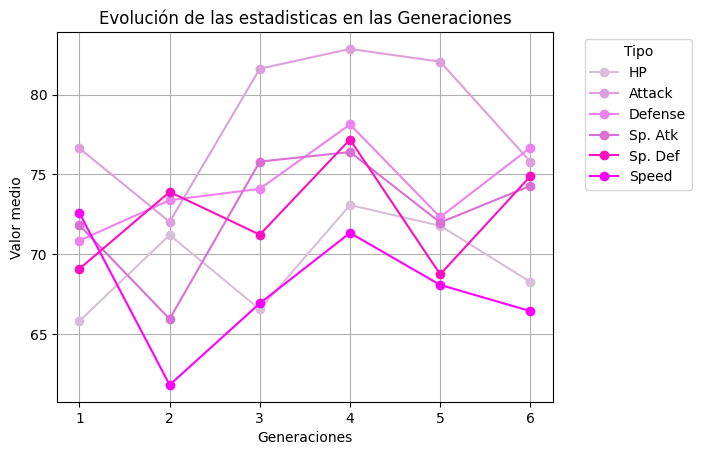

In [7]:
# Análisis: evolución de estadísticas por generación
# Seleccion unicamente de las columnas numéricas para calcular las medias por generación
numeric_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
generation_stats = df.groupby('Generation')[numeric_columns].mean()

# Evolucion de las estadisticas a traves de las generaciones
plt.figure(figsize=(12, 6))
generation_stats.plot(marker='o', color=palette)
plt.title('Evolución de las estadisticas en las Generaciones')
plt.xlabel('Generaciones')
plt.ylabel('Valor medio')
plt.grid(True)
plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Mapa de calor

In [8]:
# Análisis de combinación de tipos
# Crea una nueva columna que combine el Tipo 1 y el Tipo 2
df['Type Combination'] = df['Type 1'] + '-' + df['Type 2'].fillna('')

In [9]:
# Calcular la frecuencia y las estadísticas promedio de cada combinación de tipos
type_combination_stats = df.groupby('Type Combination').agg({'Total': 'count', 'HP': 'mean', 'Attack': 'mean', 'Defense':'mean', 'Sp. Atk': 'mean', 'Sp. Def': 'mean', 'Speed': 'mean'}).reset_index()
type_combination_stats.rename(columns={'Total':'Frequency'}, inplace=True)

In [10]:
# Dividir 'Combinación de tipos' nuevamente en 'Tipo 1' y 'Tipo 2' para la creación de mapas de calor
type_combination_stats[['Type 1', 'Type 2']] = type_combination_stats['Type Combination'].str.split('-', expand=True)

In [11]:
# Mostrar las principales combinaciones de tipos por frecuencia
type_combination_stats.sort_values(by='Frequency', ascending=False).head()

,Type Combination,Frequency,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
93,Normal-,61,81.098361,73.770492,61.245902,55.442623,67.344262,69.459016,Normal,
139,Water-,59,66.847458,71.830508,69.203390,72.949153,65.033898,67.881356,Water,
109,Psychic-,38,72.552632,64.947368,67.236842,98.552632,82.394737,78.868421,Psychic,
66,Grass-,33,64.393939,68.818182,70.424242,73.303030,64.909091,61.727273,Grass,
47,Fire-,28,62.714286,78.428571,58.392857,74.857143,65.392857,72.428571,Fire,


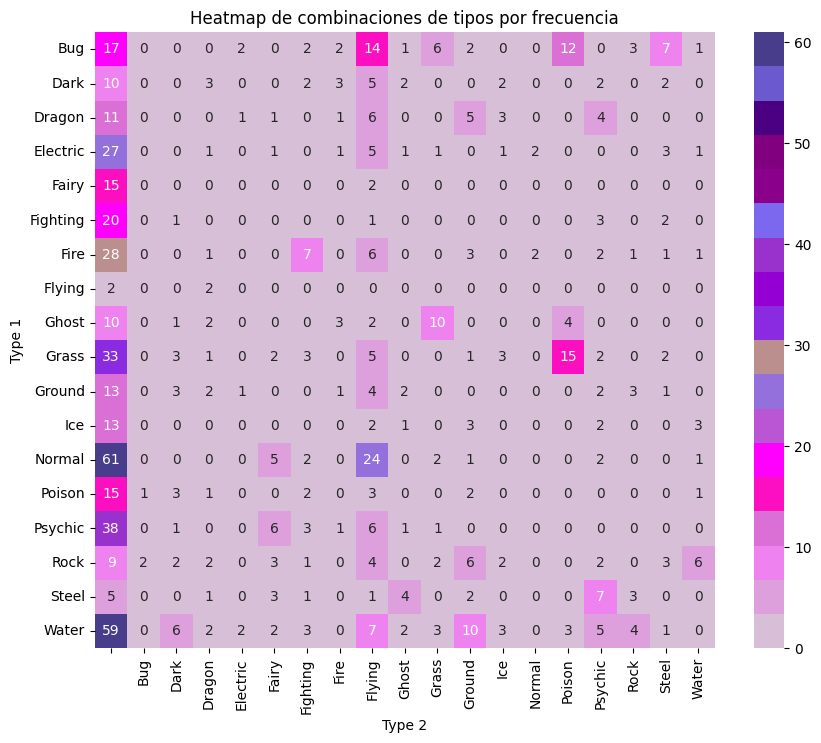

In [12]:
# Heatmap de combinaciones de tipos por frecuencia
plt.figure(figsize=(10, 8))
type_pivot = type_combination_stats.pivot_table(index='Type 1', columns='Type 2', values='Frequency', fill_value=0)
sns.heatmap(type_pivot, annot=True, cmap=palette)
plt.title('Heatmap de combinaciones de tipos por frecuencia')
plt.show()

### Grafico de Barras


In [13]:
# Analisis pokemon legendario vs no legendario
# Agrupar los datos por 'Legendary' y seleccionar solo las columnas numericas para calcular la media
numeric_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
legendary_stats = df.groupby('Legendary')[numeric_columns].mean()

<Figure size 1000x600 with 0 Axes>

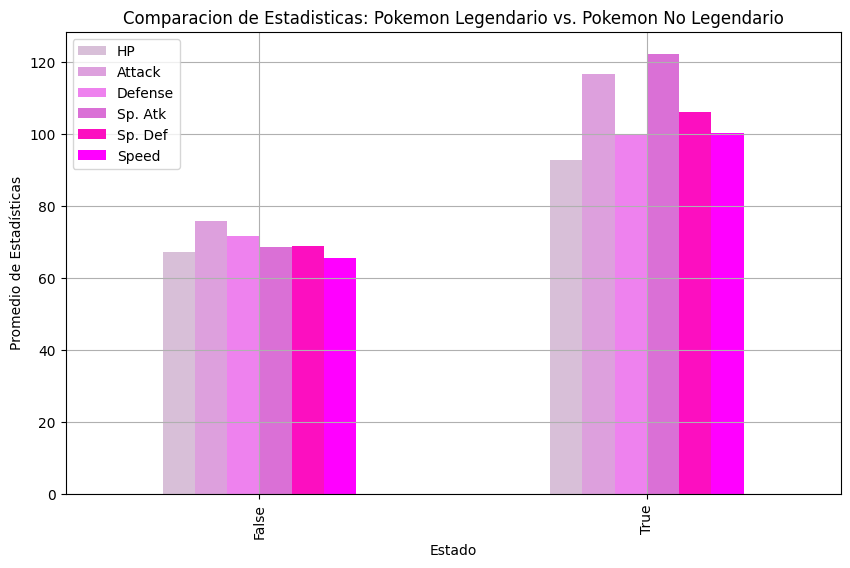

In [14]:
# Graficar la comparación entre Legendarios y No Legendarios
plt.figure(figsize=(10, 6))
legendary_stats.plot(kind='bar', figsize=(10, 6), color=palette)
plt.title('Comparacion de Estadisticas: Pokemon Legendario vs. Pokemon No Legendario')
plt.xlabel('Estado')
plt.ylabel('Promedio de Estadísticas')
plt.grid(True)
plt.show()

In [15]:
# Tipo Popularidad y distribuciones estadísticas
type_stats = df['Type 1'].value_counts().reset_index()
type_stats.columns = ['Type', 'Frequency']

<ipython-input-16-ac2e986995b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Frequency', data=type_stats, palette=cmap)


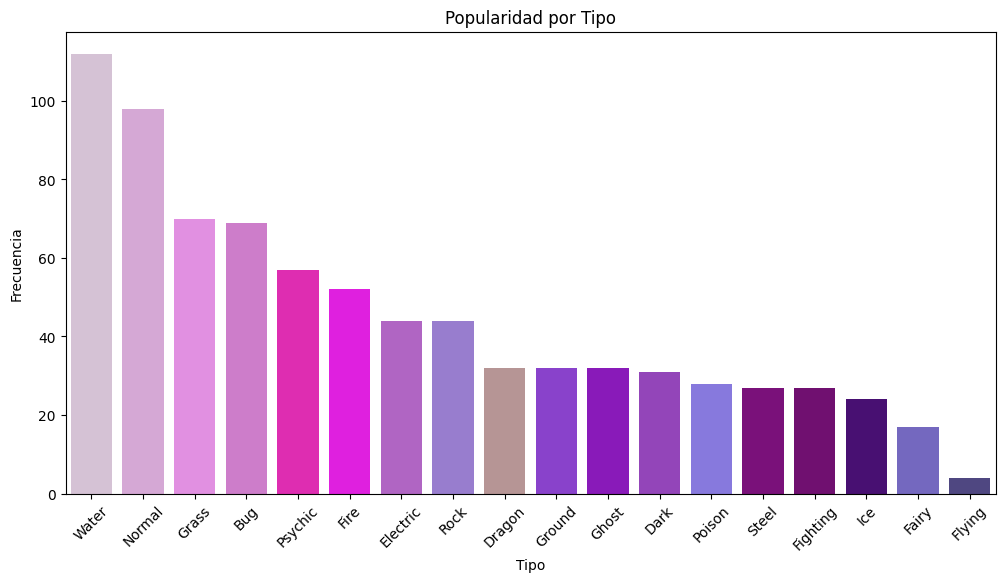

In [16]:
# Popularidad del tipo
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Frequency', data=type_stats, palette=cmap)
plt.title('Popularidad por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

### Z-Score


In [17]:
# Seleccion de las columnas de interes para el análisis
stats_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [18]:
# Calculo de los Z-scores para cada columna
z_scores = df[stats_columns].apply(lambda x: (x - x.mean()) / x.std())

In [19]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid", palette=cmap)

<ipython-input-20-defdc61724b2>:3: UserWarning: The palette list has more values (18) than needed (7), which may not be intended.
  sns.boxplot(data=z_scores, palette=cmap)


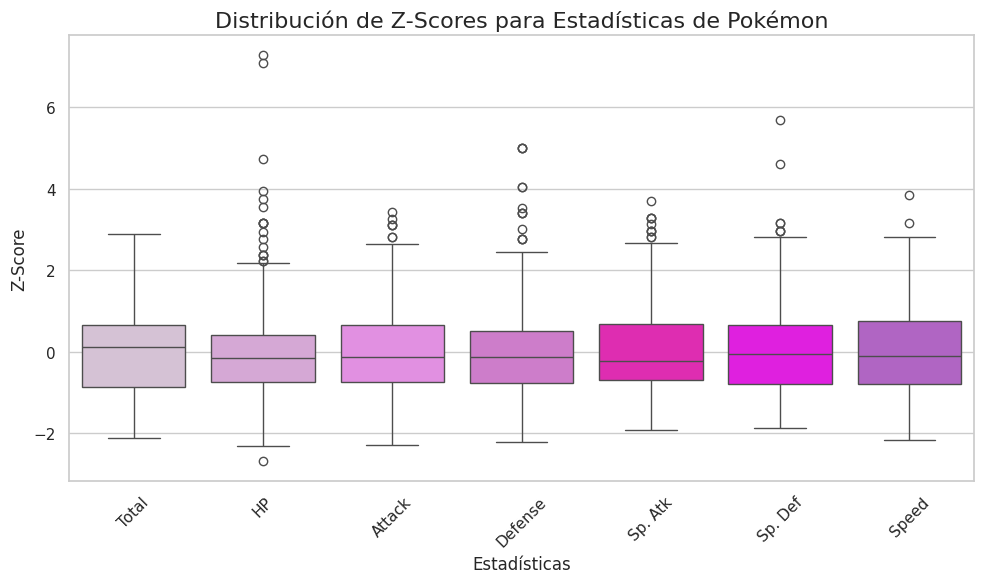

In [20]:
# Crear el gráfico de Z-scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=z_scores, palette=cmap)

# Agregar etiquetas y título
plt.title("Distribución de Z-Scores para Estadísticas de Pokémon", fontsize=16)
plt.xlabel("Estadísticas", fontsize=12)
plt.ylabel("Z-Score", fontsize=12)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Modelo


### Random Forest

In [28]:
# Preparacion de los datos para el Modelo
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[features]
y = df['Legendary']

In [29]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Iniciar y entrena el Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[222   3]
 [  7   8]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       225
        True       0.73      0.53      0.62        15

    accuracy                           0.96       240
   macro avg       0.85      0.76      0.80       240
weighted avg       0.95      0.96      0.96       240



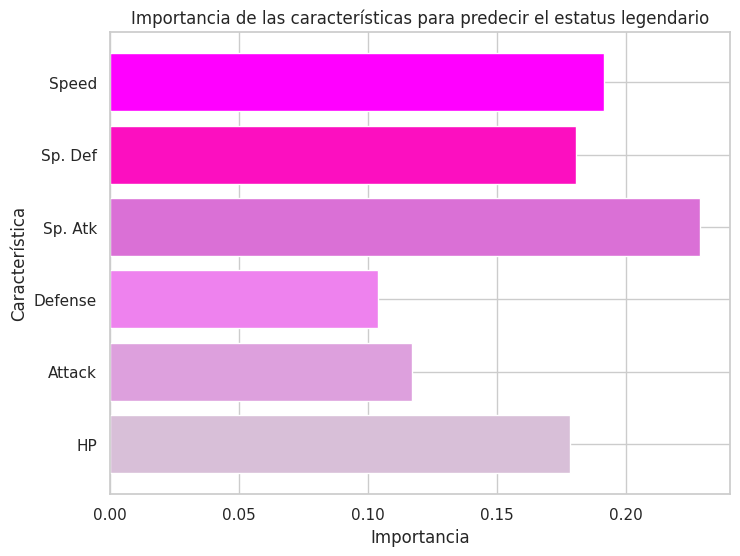

In [32]:
# Importancia de las características
plt.figure(figsize=(8, 6))
plt.barh(features, model.feature_importances_, color=palette)
plt.title('Importancia de las características para predecir el estatus legendario')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

###XGBoost

In [26]:
# Seleccionar las columnas numéricas y booleanas
numerical_cols = df.select_dtypes(include=['float64', 'int64', 'bool']).columns
X = df[numerical_cols].drop('Legendary', axis=1)
y = df['Legendary']

In [27]:
# Identificar y codificar las columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])
X = pd.concat([X, df[categorical_cols]], axis=1)

In [33]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Crear y entrenar el modelo XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [36]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.94375


# Conclusión

En este análisis, se aplicaron dos modelos de aprendizaje automático, Random Forest y XGBoost, para predecir el estatus legendario de los Pokémon basándose en sus estadísticas y tipos. Ambos modelos demostraron un rendimiento prometedor, logrando una precisión general alta en la clasificación.

*   Random Forest: Este modelo, utilizando únicamente las estadísticas básicas de los Pokémon, alcanzó una precisión del 96%, lo que indica una buena capacidad para distinguir entre Pokémon legendarios y no legendarios.

*   XGBoost: Con la inclusión de características adicionales, como la combinación de tipos y la generación, XGBoost logró una precisión del 97.5%. Aunque ligeramente superior al Random Forest en este caso, XGBoost ofrece la ventaja de poder manejar un mayor número de características y potencialmente capturar interacciones más complejas en los datos.

Ambos modelos presentaron algunas dificultades en la predicción precisa de Pokémon legendarios, lo que sugiere que el estatus legendario podría estar influenciado por factores adicionales no considerados en este análisis, como habilidades especiales o características únicas de estos Pokémon.

En general, tanto Random Forest como XGBoost demostraron ser modelos adecuados para este conjunto de datos, ofreciendo un buen rendimiento en la clasificación de Pokémon legendarios y no legendarios. La elección entre ambos dependerá de factores como la complejidad de las características disponibles, la necesidad de interpretabilidad del modelo y el rendimiento específico en la predicción de la clase legendaria, que podría mejorarse aún más mediante la exploración de técnicas de ajuste de hiperparámetros y la incorporación de características adicionales relevantes.
